# **Proyek Akhir: Menyelesaikan Permasalahan Dropout Mahasiswa di Kiyut Institute**

- Nama: Muhammad Sahrul
- Email: m.sahrul59@gmail.com
- Id Dicoding: sahrul57

## **Persiapan**

Menyiapkan library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier, plot_importance

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix
)

# Utilities
from joblib import dump

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [1]:
dataset = pd.read_csv('data\Student-Performance.csv') 
dataset.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


Membaca file CSV Student-Performance.csv menggunakan Pandas dan menyimpannya dalam DataFrame dataset

In [ ]:
categorical_columns = ['Marital status', 'Application mode','Application order', 'Course', 'Daytime/evening attendance\t',
    'Previous qualification', 'Nacionality', "Mother's qualification",
    "Father's qualification", "Mother's occupation", "Father's occupation",
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International', 'Target']

lb = LabelEncoder()

for column in categorical_columns:
    dataset[column] = lb.fit_transform(dataset[column])

dataset

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,7,5,1,1,0,122.0,0,12,9,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,0,5,1,10,1,0,160.0,0,0,2,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,0,0,5,4,1,0,122.0,0,21,26,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,0,7,2,14,1,0,122.0,0,22,26,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,1,11,1,2,0,0,100.0,0,21,27,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,0,6,14,1,0,125.0,0,0,0,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,0,0,2,14,1,0,120.0,18,0,0,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,0,0,1,11,1,0,154.0,0,21,26,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,0,0,1,8,1,0,180.0,0,21,26,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


## **Data Understanding**

In [ ]:
dataset.duplicated().value_counts()

,count
False,4424


Mengecek apakah terdapat baris duplikat dalam dataset. Menampilkan jumlah baris unik dan duplikat dalam bentuk distribusi False (tidak duplikat).

In [ ]:
dataset.duplicated().sum()

0

Menghitung total jumlah baris yang terdeteksi sebagai duplikat. Berguna untuk memahami kualitas data dan menentukan apakah diperlukan pembersihan data lebih lanjut.

In [ ]:
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.178571,5.886980,1.727396,8.899186,0.890823,1.531420,132.613314,0.254521,11.322107,15.455244,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,5.298964,1.311632,4.331792,0.311897,3.963707,13.188332,1.748447,9.026251,11.044800,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000,125.000000,0.000000,1.000000,2.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,0.000000,7.000000,1.000000,9.000000,1.000000,0.000000,133.100000,0.000000,12.000000,13.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,0.000000,11.000000,2.000000,12.000000,1.000000,0.000000,140.000000,0.000000,21.000000,26.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,5.000000,17.000000,7.000000,16.000000,1.000000,16.000000,190.000000,20.000000,28.000000,33.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Melihat jumlah total dataset, tipe data pada setiap kolom.

In [ ]:
dataset.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


Mengidentifikasi Missing Value pada dataset

In [ ]:
dataset['Father\'s occupation'].fillna(dataset['Father\'s occupation'].mode()[0], inplace = True)

<ipython-input-9-f24483dc1f03>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Father\'s occupation'].fillna(dataset['Father\'s occupation'].mode()[0], inplace = True)


In [ ]:
dataset['Father\'s qualification'].fillna(dataset['Father\'s qualification'].mode()[0], inplace = True)

<ipython-input-10-d81b104e5ea9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Father\'s qualification'].fillna(dataset['Father\'s qualification'].mode()[0], inplace = True)


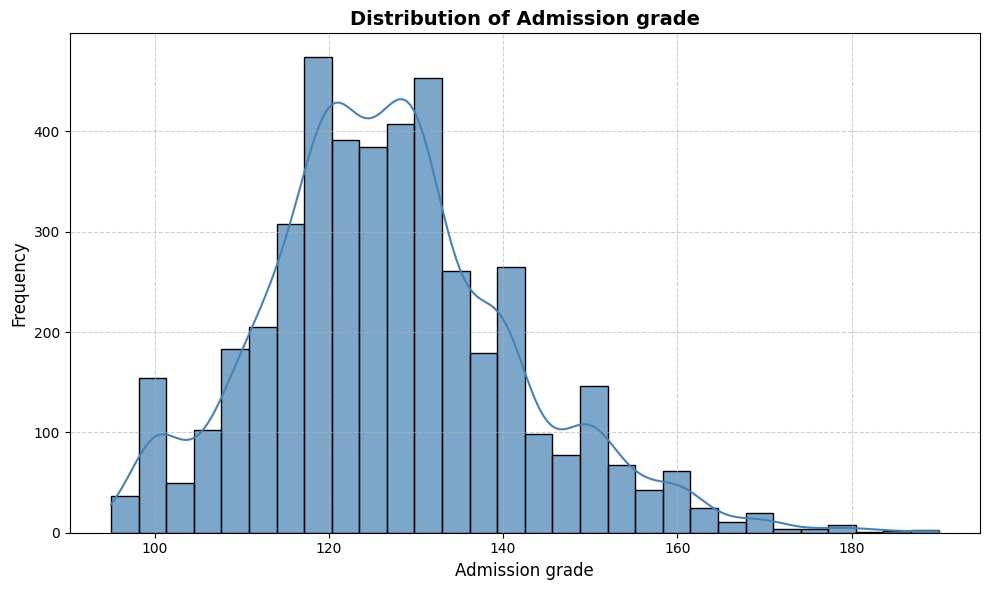

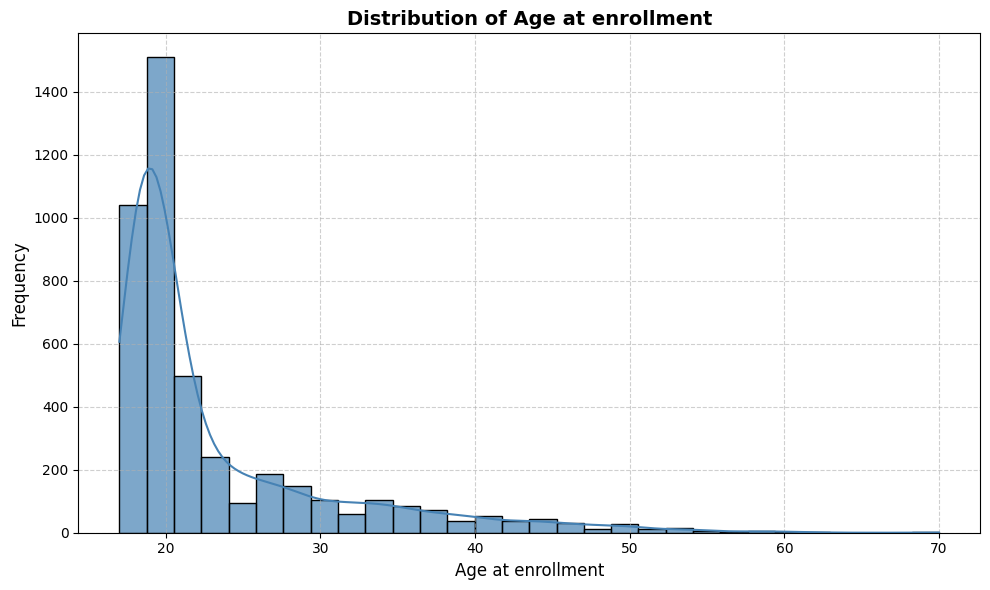

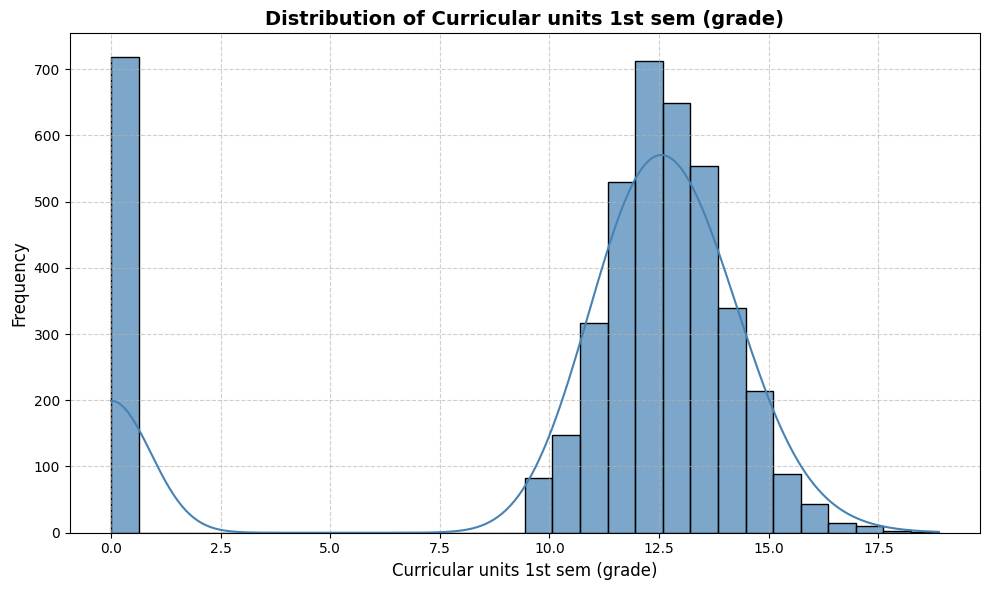

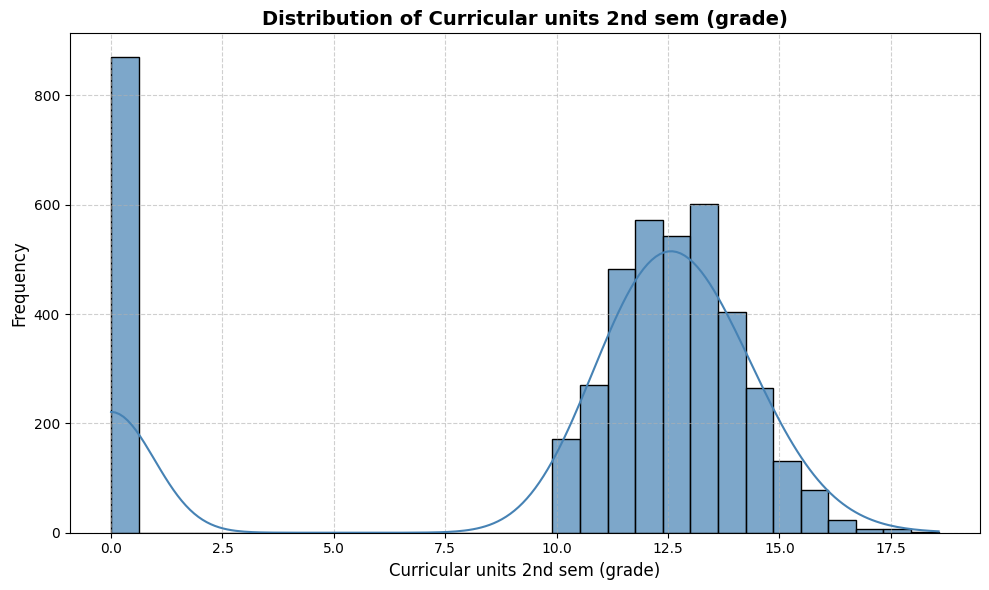

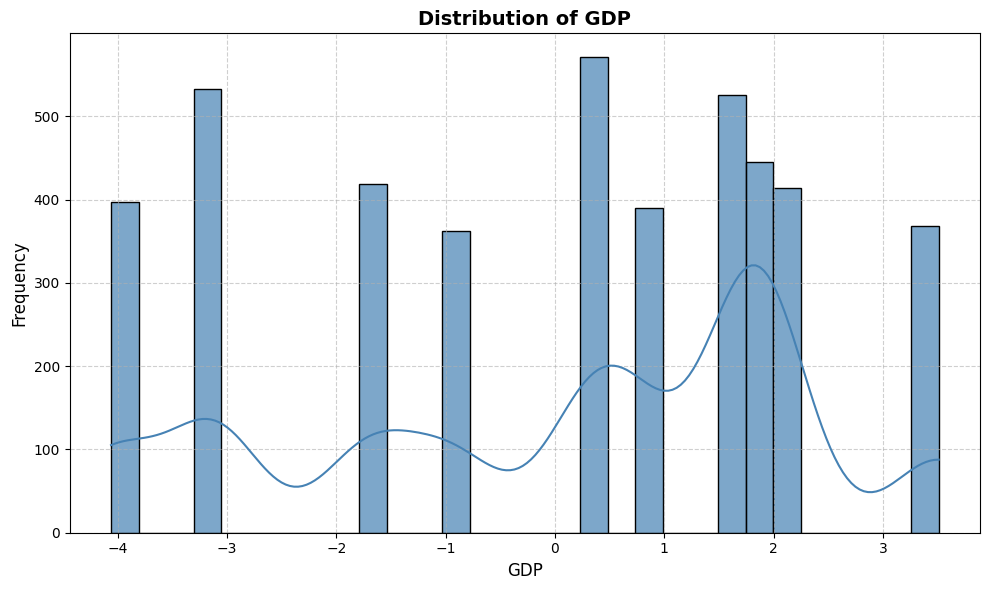

<ipython-input-11-a8d16e773f00>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=feature, palette='Set2', edgecolor='black')


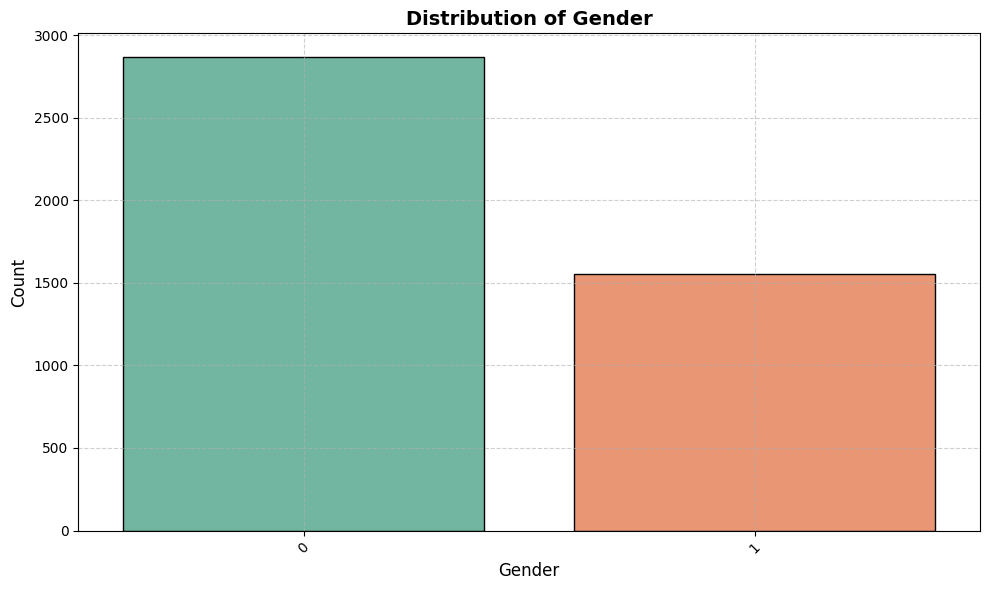

<ipython-input-11-a8d16e773f00>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=feature, palette='Set2', edgecolor='black')


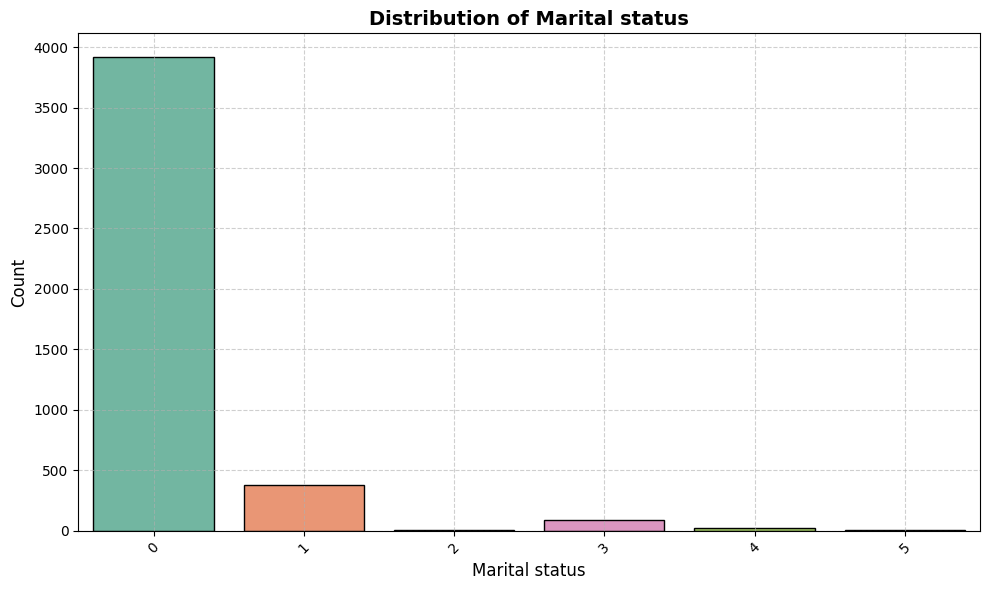

<ipython-input-11-a8d16e773f00>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=feature, palette='Set2', edgecolor='black')


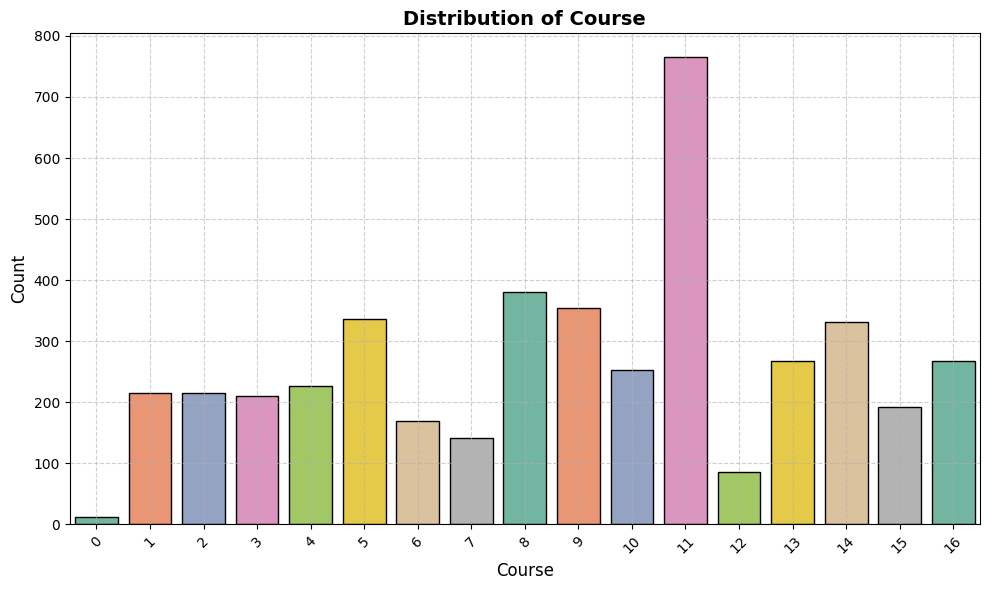

<ipython-input-11-a8d16e773f00>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=feature, palette='Set2', edgecolor='black')


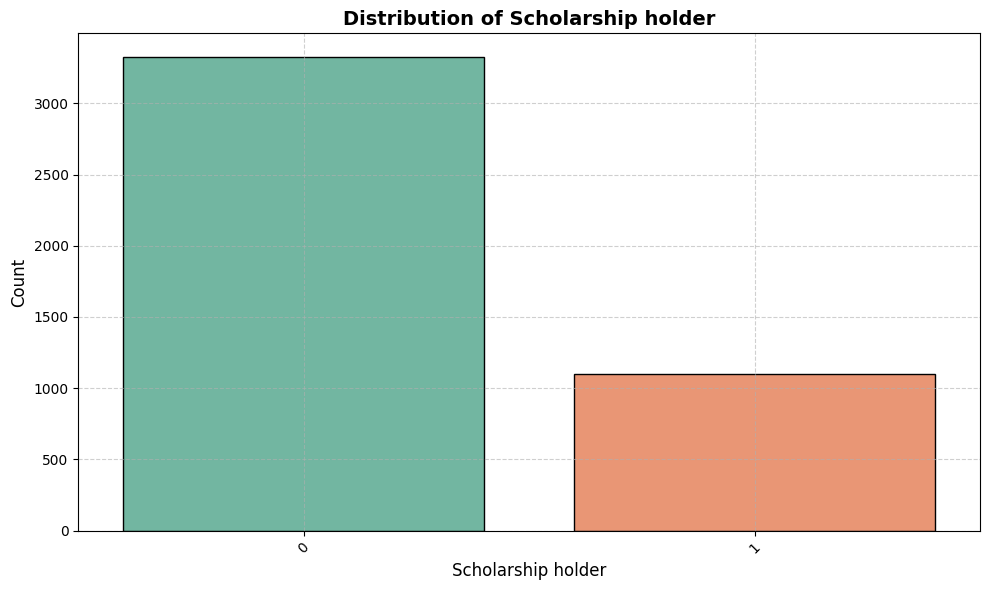

In [ ]:
# Distribusi Data untuk Fitur-Fitur Kunci
numerical_features = ['Admission grade', 'Age at enrollment', 'Curricular units 1st sem (grade)',
                      'Curricular units 2nd sem (grade)', 'GDP']
categorical_features = ['Gender', 'Marital status', 'Course', 'Scholarship holder']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset[feature], kde=True, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataset, x=feature, palette='Set2', edgecolor='black')
    plt.title(f'Distribution of {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

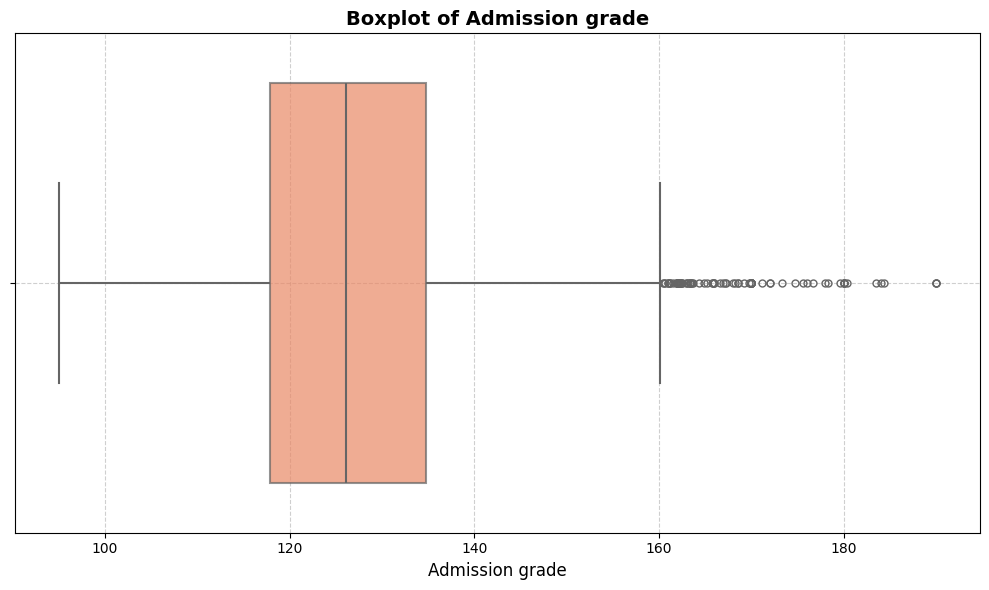

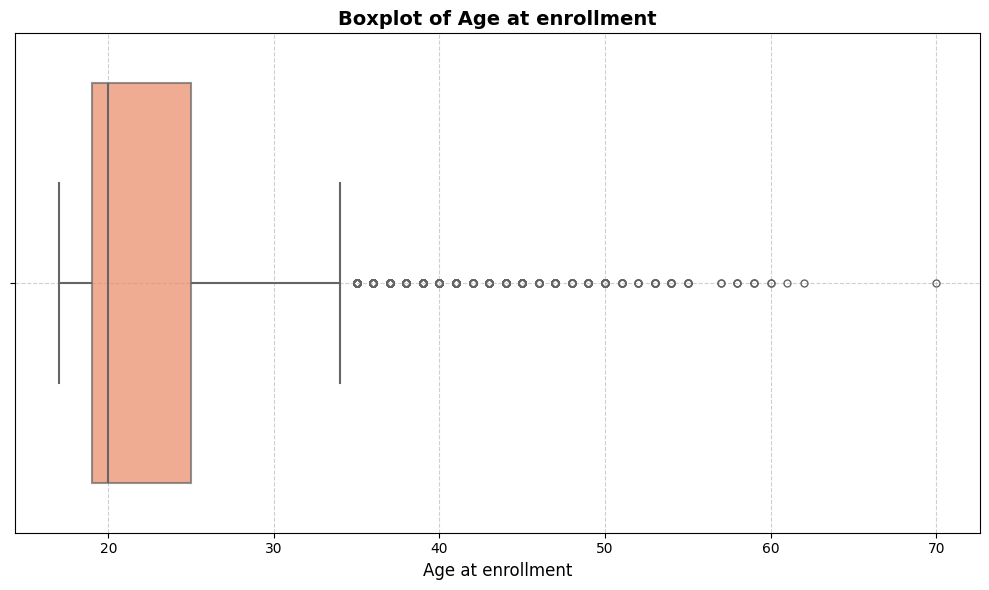

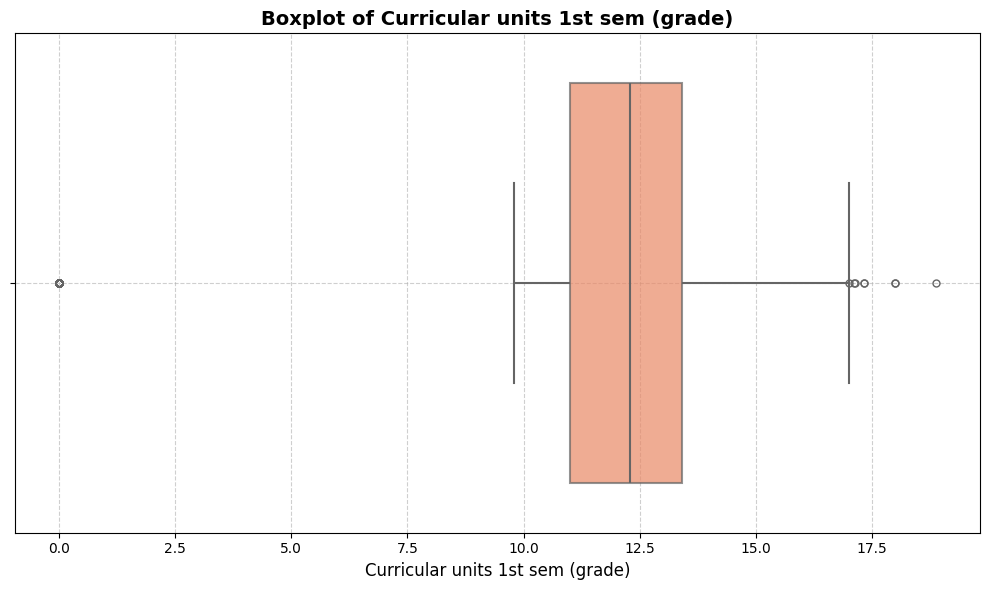

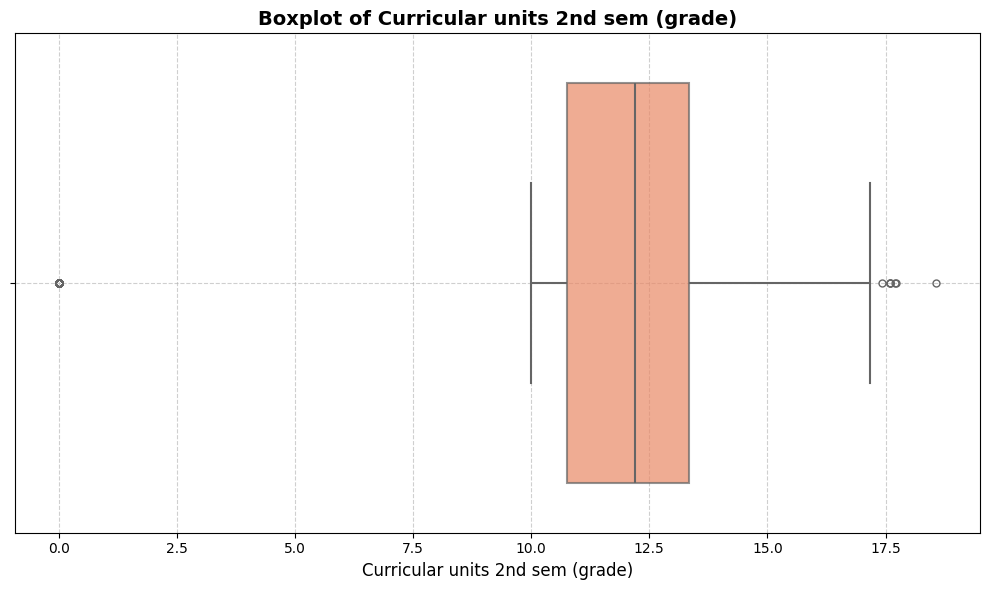

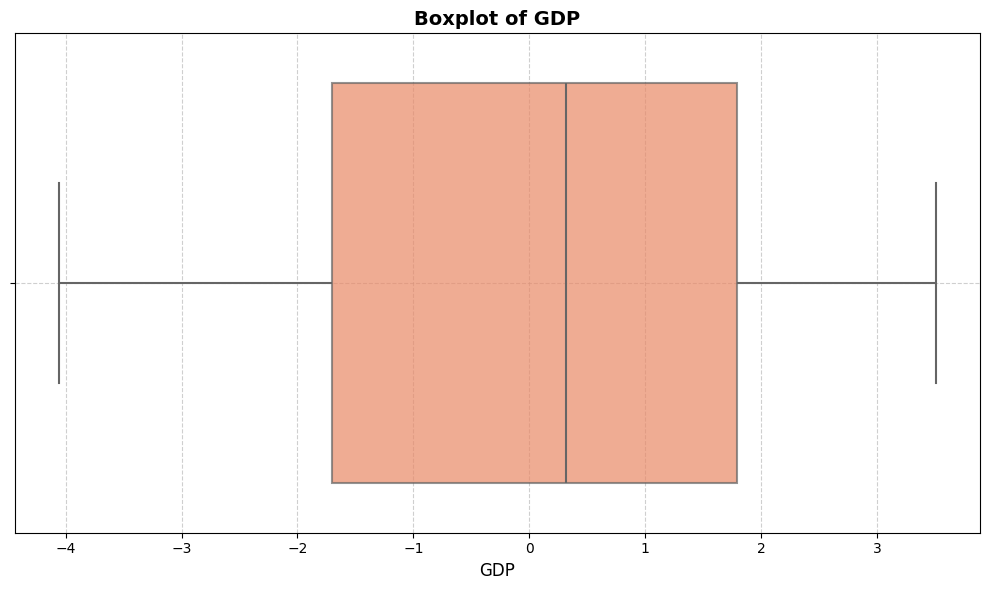

In [ ]:
# 3. Pemeriksaan Outlier
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=dataset[feature], color='coral', fliersize=5, linewidth=1.5, boxprops=dict(alpha=0.7))
    plt.title(f'Boxplot of {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

<ipython-input-13-64536f7949da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Target', y=feature, palette='coolwarm', fliersize=5, linewidth=1.5, boxprops=dict(alpha=0.7))


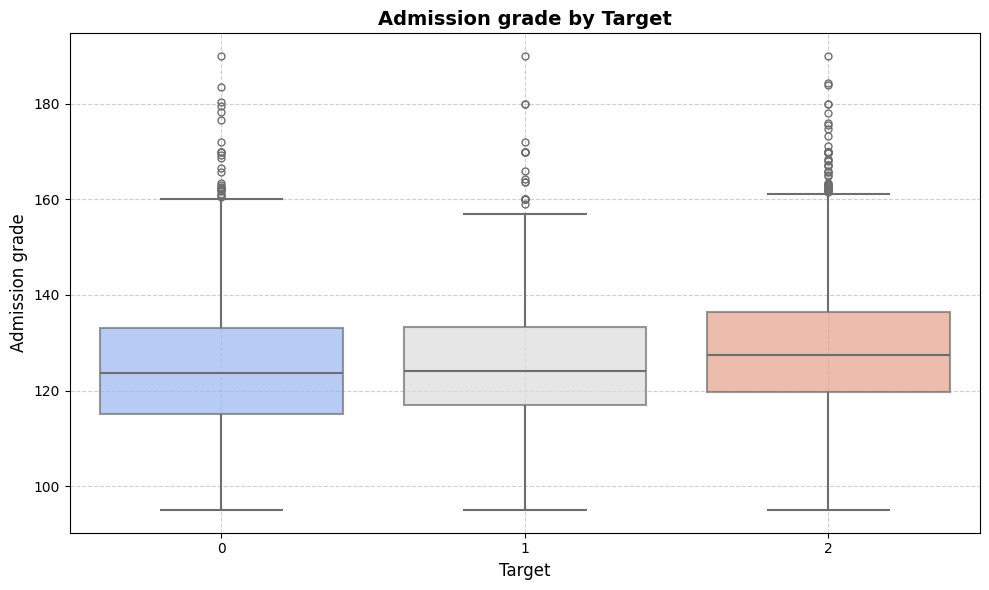

<ipython-input-13-64536f7949da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Target', y=feature, palette='coolwarm', fliersize=5, linewidth=1.5, boxprops=dict(alpha=0.7))


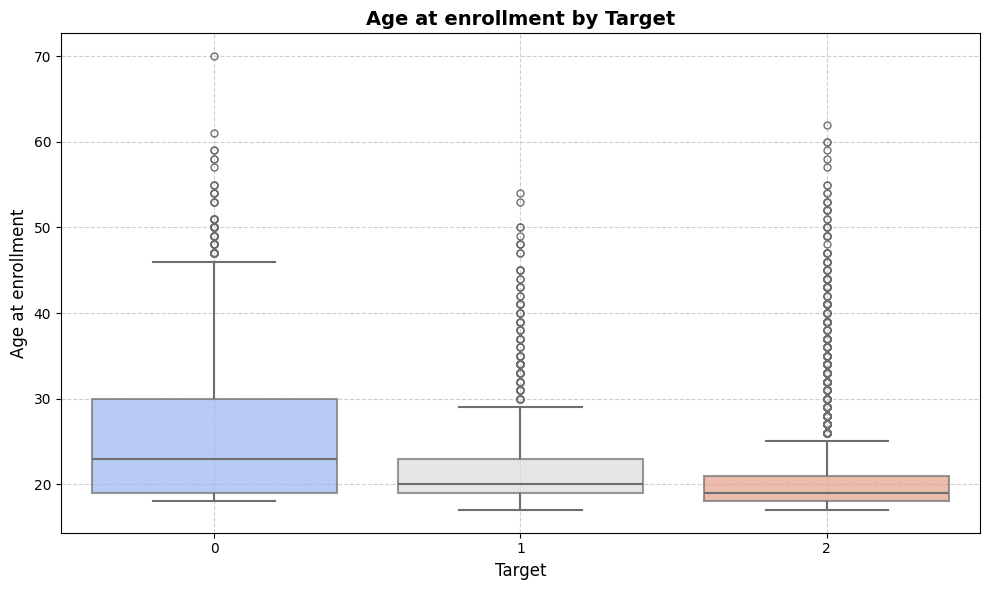

<ipython-input-13-64536f7949da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Target', y=feature, palette='coolwarm', fliersize=5, linewidth=1.5, boxprops=dict(alpha=0.7))


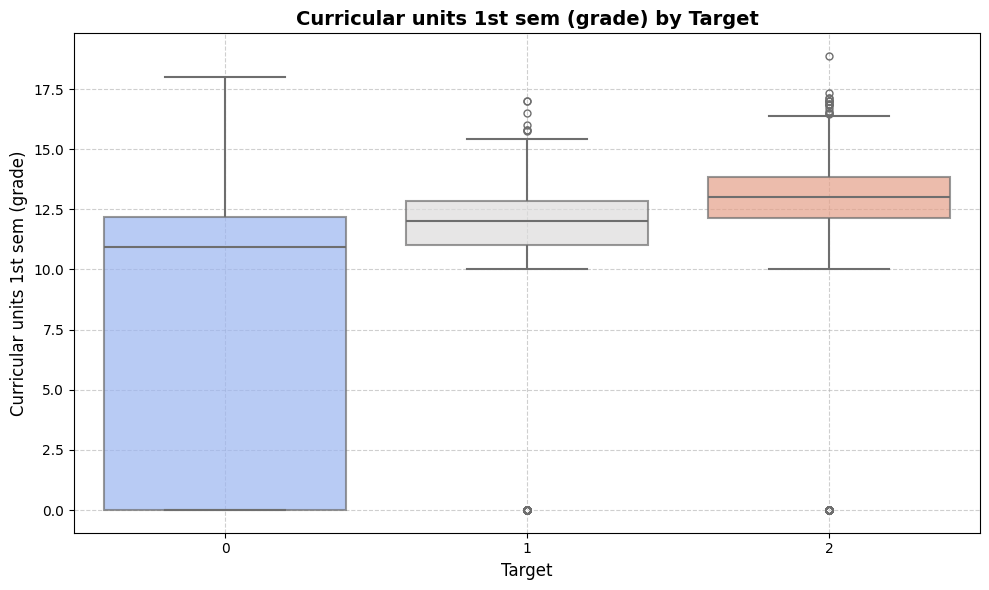

<ipython-input-13-64536f7949da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Target', y=feature, palette='coolwarm', fliersize=5, linewidth=1.5, boxprops=dict(alpha=0.7))


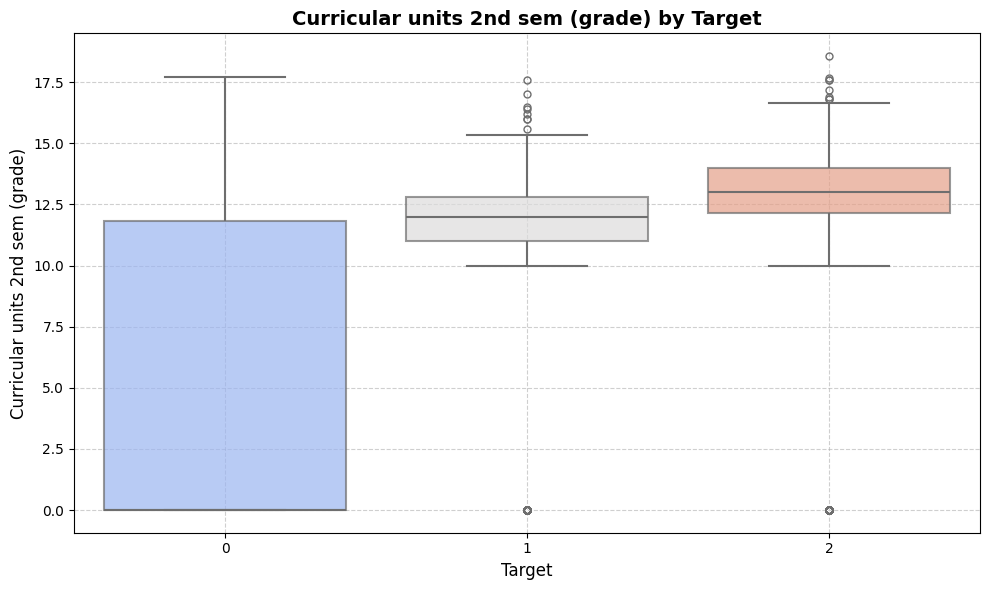

<ipython-input-13-64536f7949da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Target', y=feature, palette='coolwarm', fliersize=5, linewidth=1.5, boxprops=dict(alpha=0.7))


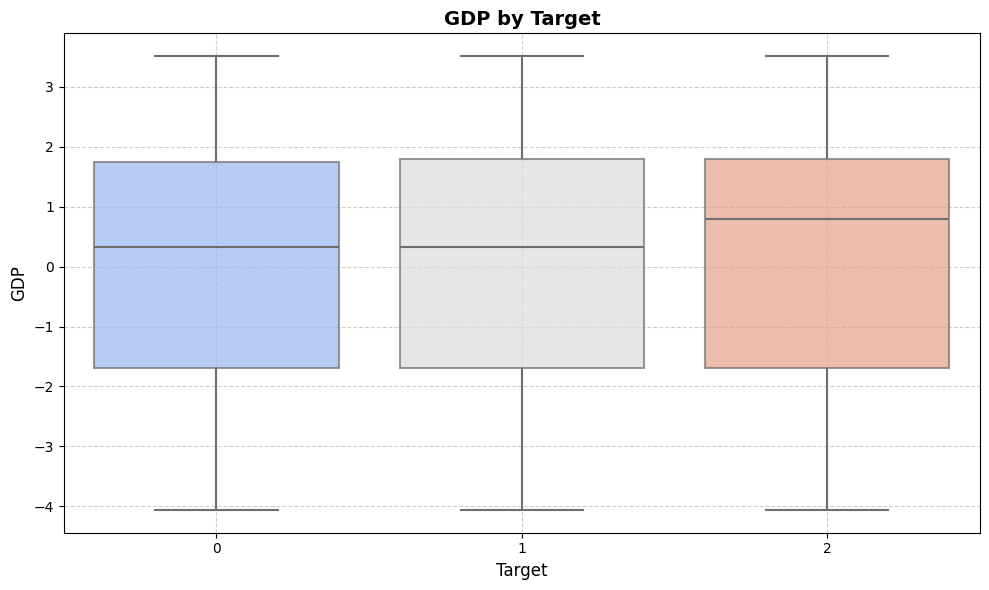

In [ ]:
# Perbandingan Antar Kelompok
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataset, x='Target', y=feature, palette='coolwarm', fliersize=5, linewidth=1.5, boxprops=dict(alpha=0.7))
    plt.title(f'{feature} by Target', fontsize=14, fontweight='bold')
    plt.xlabel('Target', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


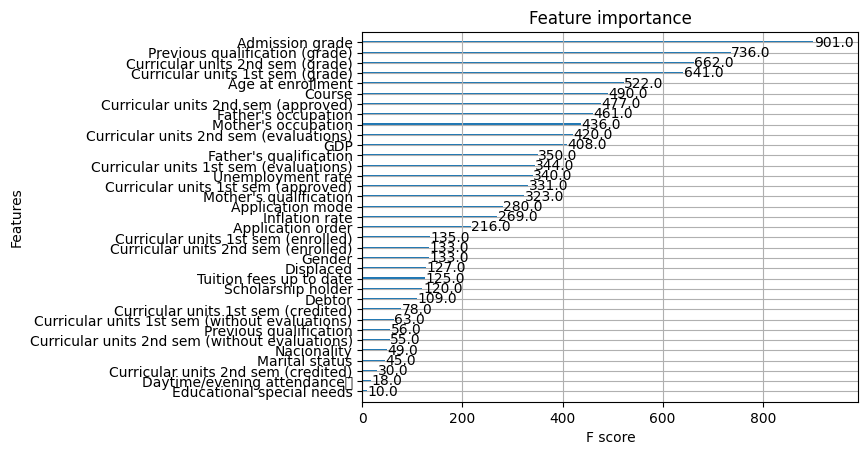

In [ ]:
features = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)',
    'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation",
    "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment',
    'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# Splitting the data into features and target
X = dataset[features]
y = dataset['Target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an XGBoost classifier
clf = xgb.XGBClassifier(random_state=42)

# Fitting the model on the training data
clf.fit(X_train, y_train)


# Plotting feature importance
plot_importance(clf)
plt.show()

# Getting feature importances
feature_importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)

# Selecting the top 14 features based on F-score
selected_features = feature_importances[:14].index.tolist()

# Creating a new DataFrame with only the selected features
newdf = dataset[selected_features + ['Target']]

Gambar tersebut menunjukkan **Feature Importance** dari suatu model Machine Learning, yang mengindikasikan fitur mana yang paling berpengaruh dalam menentukan prediksi.

1. Membantu memahami fitur mana yang paling signifikan dalam mempengaruhi prediksi model.
2. Fitur dengan skor tinggi dapat diprioritaskan dalam analisis lebih lanjut atau optimasi model.
3. Fitur dengan skor rendah bisa dipertimbangkan untuk dihapus guna menyederhanakan model.

In [ ]:
newdf.columns

Index(['Curricular units 2nd sem (approved)', 'Tuition fees up to date',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (enrolled)', 'Scholarship holder',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (credited)', 'Course', 'Debtor',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 1st sem (credited)', 'Mother's occupation', 'Target'],
      dtype='object')

In [ ]:
dataset['Mother\'s occupation']

,Mother's occupation
0,5
1,3
2,9
3,5
4,9
...,...
4419,5
4420,9
4421,9
4422,7


In [ ]:
values  = ['Course',
       'Previous qualification (grade)','Mother\'s qualification', 'Father\'s qualification',
       'Mother\'s occupation', 'Father\'s occupation', 'Admission grade','Gender',
       'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'GDP', 'Target']

newdf = dataset[values]

In [ ]:
newdf

,Course,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Gender,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,122.0,12,9,5,9,127.3,1,20,0,0,0.000000,0,0,0.000000,1.74,0
1,10,160.0,0,2,3,3,142.5,1,19,6,6,14.000000,6,6,13.666667,0.79,2
2,4,122.0,21,26,9,9,124.8,1,19,0,0,0.000000,0,0,0.000000,1.74,0
3,14,122.0,22,26,5,3,119.6,0,20,8,6,13.428571,10,5,12.400000,-3.12,2
4,2,100.0,21,27,9,9,141.5,0,45,9,5,12.333333,6,6,13.000000,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,14,125.0,0,0,5,4,122.2,1,19,7,5,13.600000,8,5,12.666667,-4.06,2
4420,14,120.0,0,0,9,9,119.0,0,18,6,6,12.000000,6,2,11.000000,2.02,0
4421,11,154.0,21,26,9,9,149.5,0,30,8,7,14.912500,9,1,13.500000,0.79,0
4422,8,180.0,21,26,7,4,153.8,0,20,5,5,13.800000,6,5,12.000000,-3.12,2


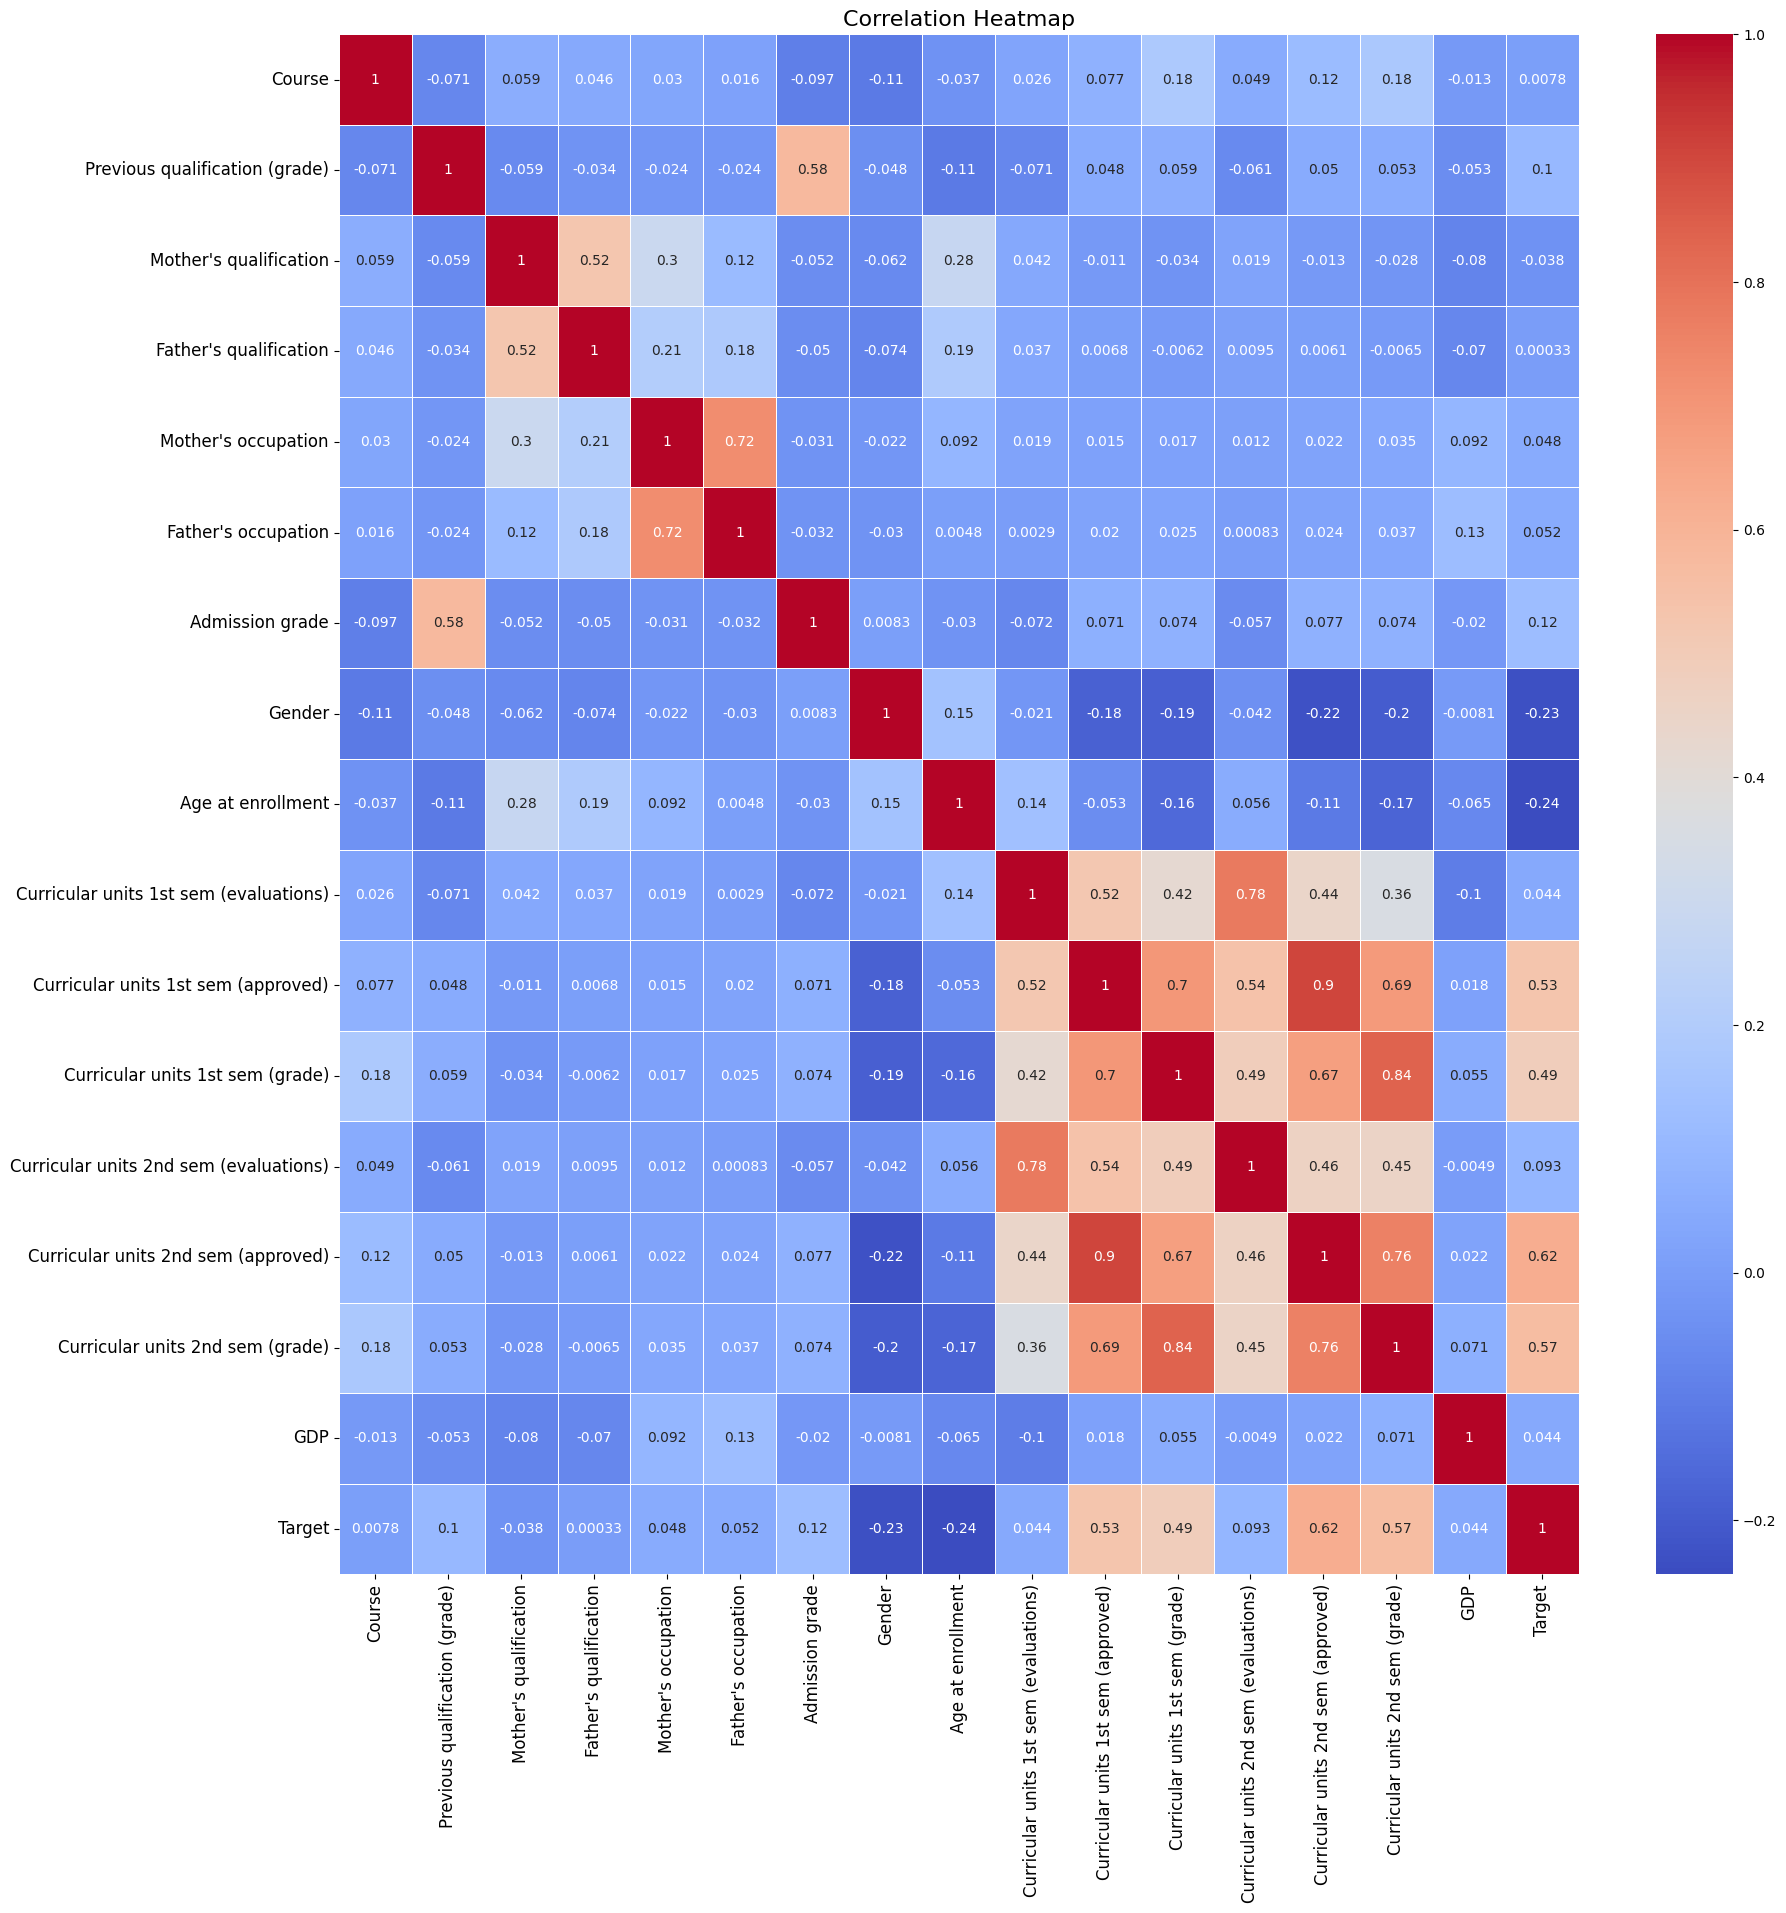

In [ ]:
# Assuming 'newdf' is your DataFrame
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(newdf.corr(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={'size': 10})

# Increase font size for x-axis and y-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=12)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## **Data Preparation**

In [ ]:
from sklearn.model_selection import train_test_split

x = newdf.drop(columns=['Target'])
y = newdf['Target']

In [ ]:
x

,Course,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Gender,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP
0,1,122.0,12,9,5,9,127.3,1,20,0,0,0.000000,0,0,0.000000,1.74
1,10,160.0,0,2,3,3,142.5,1,19,6,6,14.000000,6,6,13.666667,0.79
2,4,122.0,21,26,9,9,124.8,1,19,0,0,0.000000,0,0,0.000000,1.74
3,14,122.0,22,26,5,3,119.6,0,20,8,6,13.428571,10,5,12.400000,-3.12
4,2,100.0,21,27,9,9,141.5,0,45,9,5,12.333333,6,6,13.000000,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,14,125.0,0,0,5,4,122.2,1,19,7,5,13.600000,8,5,12.666667,-4.06
4420,14,120.0,0,0,9,9,119.0,0,18,6,6,12.000000,6,2,11.000000,2.02
4421,11,154.0,21,26,9,9,149.5,0,30,8,7,14.912500,9,1,13.500000,0.79
4422,8,180.0,21,26,7,4,153.8,0,20,5,5,13.800000,6,5,12.000000,-3.12


In [ ]:
newdf.columns

Index(['Course', 'Previous qualification (grade)', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Admission grade', 'Gender', 'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'GDP', 'Target'],
      dtype='object')

In [ ]:
newdf['Target'].replace({2:1}, inplace = True)

<ipython-input-23-331e14fb1c0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Target'].replace({2:1}, inplace = True)


In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

Membagi data train dan test, yaitu data train sebesar 80% dan data test sebesar 20%

In [ ]:
newdf['Target'].unique()

array([0, 1])

## **Modelling**

In [ ]:
class ClassificationModelRunner:
    def __init__(self, dataframe, target_column, features):
        self.dataframe = dataframe
        self.target_column = target_column
        self.features = features
        self.X = dataframe[features]
        self.y = dataframe[target_column]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Initialize MinMaxScaler
        self.scaler = MinMaxScaler()

    def preprocess_data(self):
        # Fit and transform the scaler on the training data
        self.X_train = self.scaler.fit_transform(self.X_train)

        # Transform the testing data using the scaler
        self.X_test = self.scaler.transform(self.X_test)

    def run_xgboost(self, param_grid=None):
        # Preprocess the data using MinMaxScaler
        self.preprocess_data()

        xgmodel = xgb.XGBClassifier(random_state=42)

        # Perform hyperparameter tuning using GridSearchCV
        if param_grid:
            grid_search = GridSearchCV(xgmodel, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
            grid_search.fit(self.X_train, self.y_train)
            xgmodel = grid_search.best_estimator_
            print("Best Parameters:", grid_search.best_params_)

        # Train the model on the training data
        xgmodel.fit(self.X_train, self.y_train)

        # Make predictions on the testing data
        y_pred = xgmodel.predict(self.X_test)

        # Calculate accuracy score
        accuracy = accuracy_score(self.y_test, y_pred)
        print("XGBoost Accuracy:", accuracy)

# Example usage
if __name__ == "__main__":
    # Assuming your DataFrame is named 'your_dataframe'
    # Replace 'your_dataframe' with the actual name of your DataFrame
    target_column = 'Target'
    features = [ 'Course', 'Previous qualification (grade)', 'Mother\'s qualification',
       'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation',
       'Admission grade', 'Gender', 'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'GDP']  # Replace with your actual feature names
    model_runner = ClassificationModelRunner(newdf, target_column, features)

    # Define hyperparameter grid for XGBoost
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
    }

    # Run XGBoost with hyperparameter tuning and MinMaxScaler
    model_runner.run_xgboost(param_grid)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Accuracy: 0.8338983050847457


Disini menggunakan beberapa parameter seperti :  colsample_bytree: 1.0, learning_rate: 0.1, max_depth: 3, n_estimators: 200, subsample: 1.0

In [ ]:
xgmodel = xgb.XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 3, n_estimators = 200, subsample = 0.9)

In [ ]:
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgmodel.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.8293785310734463


Akurasi dari Model Machine Learning XGBoost adalah 82,93%

## **Evaluation**

In [ ]:
from joblib import dump

In [ ]:
dump(xgmodel, 'xgboost.joblib')

['xgboost.joblib']

In [ ]:
xc = newdf.head(20)

In [ ]:
xc.to_csv('xc.csv', index = False)

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       259
           1       0.92      0.83      0.87       626

    accuracy                           0.83       885
   macro avg       0.79      0.83      0.81       885
weighted avg       0.85      0.83      0.83       885



<Axes: >

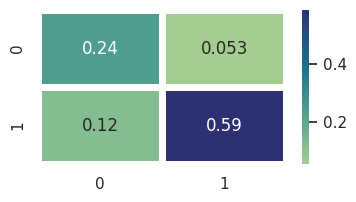

In [ ]:
# Evaluating the test set
test_pred = xgmodel.predict(x_test)

print(classification_report(test_pred, y_test))

revealer = confusion_matrix(test_pred, y_test)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

Hasil dari Confusion Matrix diatas menunjukkan hasil yang memuaskan yang dimana Akurasi sebesar 83%, Presisi sebesar 79%, Recal sebesar 83%, dan f1-score sebesar 81%

### Perbandingan Model

Bertujuan untuk mengetahui model mana yang memiliki akurasi yang paling tertinggi.

In [ ]:
dataset.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
main_dataset = dataset[['Debtor','Scholarship holder','Tuition fees up to date','Application mode','Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)','Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)','Age at enrollment', 'Target']]

In [ ]:
main_dataset

,Debtor,Scholarship holder,Tuition fees up to date,Application mode,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Age at enrollment,Target
0,0,0,1,7,0,0.000000,0,0.000000,20,0
1,0,0,0,5,6,14.000000,6,13.666667,19,2
2,0,0,0,0,0,0.000000,0,0.000000,19,0
3,0,0,1,7,6,13.428571,5,12.400000,20,2
4,0,0,1,11,5,12.333333,6,13.000000,45,2
...,...,...,...,...,...,...,...,...,...,...
4419,0,0,1,0,5,13.600000,5,12.666667,19,2
4420,1,0,0,0,6,12.000000,2,11.000000,18,0
4421,0,1,1,0,7,14.912500,1,13.500000,30,0
4422,0,1,1,0,5,13.800000,5,12.000000,20,2


In [ ]:
main_dataset['Target'].replace({2:1}, inplace = True)

<ipython-input-39-2a5df531390a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_dataset['Target'].replace({2:1}, inplace = True)
<ipython-input-39-2a5df531390a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_dataset['Target'].replace({2:1}, inplace = True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def minmax_scale_columns(df, columns_to_scale):
    # Create a MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the specified columns
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    return df

# Columns to scale
columns_to_scale = ['Debtor', 'Scholarship holder', 'Tuition fees up to date',
                    'Application mode', 'Curricular units 1st sem (approved)',
                    'Curricular units 1st sem (grade)',
                    'Curricular units 2nd sem (approved)',
                    'Curricular units 2nd sem (grade)', 'Age at enrollment', 'Target']

# Assuming 'main_dataset' is your DataFrame
main_dataset_scaled = minmax_scale_columns(main_dataset.copy(), columns_to_scale)

In [ ]:
main_dataset_scaled

,Debtor,Scholarship holder,Tuition fees up to date,Application mode,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Age at enrollment,Target
0,0.0,0.0,1.0,0.411765,0.000000,0.000000,0.00,0.000000,0.056604,0.0
1,0.0,0.0,0.0,0.294118,0.230769,0.741722,0.30,0.735897,0.037736,1.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.037736,0.0
3,0.0,0.0,1.0,0.411765,0.230769,0.711447,0.25,0.667692,0.056604,1.0
4,0.0,0.0,1.0,0.647059,0.192308,0.653422,0.30,0.700000,0.528302,1.0
...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.0,1.0,0.000000,0.192308,0.720530,0.25,0.682051,0.037736,1.0
4420,1.0,0.0,0.0,0.000000,0.230769,0.635762,0.10,0.592308,0.018868,0.0
4421,0.0,1.0,1.0,0.000000,0.269231,0.790066,0.05,0.726923,0.245283,0.0
4422,0.0,1.0,1.0,0.000000,0.192308,0.731126,0.25,0.646154,0.056604,1.0


In [ ]:
X = main_dataset_scaled.drop('Target', axis=1)
y = main_dataset_scaled['Target']

In [ ]:
dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
xbc = XGBClassifier(tree_method='gpu_hist', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 3, n_estimators = 200, subsample = 0.9)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
abc.fit(X_train, y_train)
xbc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
def train_and_evaluate(clf, clf_name, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print accuracy
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    print(f"{clf_name} Accuracy: {accuracy}%")

# Example usage:
# Assuming you have classifiers dtree, rfc, lr, knn, abc, xbc, and datasets X_train, y_train, X_test, y_test

# Decision Tree
train_and_evaluate(dtree, 'Decision Tree', X_train, y_train, X_test, y_test)
# XGBoost
train_and_evaluate(xbc, 'XGBoost', X_train, y_train, X_test, y_test)

# Random Forest
train_and_evaluate(rfc, 'Random Forest', X_train, y_train, X_test, y_test)

# Logistic Regression
train_and_evaluate(lr, 'Logistic Regression', X_train, y_train, X_test, y_test)

# k-Nearest Neighbors
train_and_evaluate(knn, 'k-Nearest Neighbors', X_train, y_train, X_test, y_test)

# AdaBoost
train_and_evaluate(abc, 'AdaBoost', X_train, y_train, X_test, y_test)

Decision Tree Accuracy: 80.11%


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:20] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.


XGBoost Accuracy: 86.1%
Random Forest Accuracy: 85.54%
Logistic Regression Accuracy: 83.95%
k-Nearest Neighbors Accuracy: 83.16%
AdaBoost Accuracy: 84.52%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Diketahui bahwa model XGBoost lah yang memiliki akurasi tertinggi yaitu **86.1%**, maka model XGBoost yang digunakan sebagai model Machine Learning untuk Deployment.

In [ ]:
dump(xbc, 'xbcmodel.joblib')

['xbcmodel.joblib']